In [1]:
# load libraries
library(dplyr)
library(Seurat)
library(ggplot2)
library(cowplot)
library(harmony)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************

Loading required package: Rcpp


In [2]:
# load for pretty color palletes
if (!require("RColorBrewer")) {
install.packages("RColorBrewer")
library(RColorBrewer)
}

Loading required package: RColorBrewer


In [3]:
# load the datasets into individual seurat objects
# add sample, tissue, and batch metadata
spl1.data <- Read10X(data.dir = "/home/jcrowl/scratch/TC007_single_cell/CellRanger_output_9_16/TC_9/outs/filtered_feature_bc_matrix")
spl1 <- CreateSeuratObject(counts = spl1.data, project = "Tissue_Spl1", min.cells = 3, min.features = 200)
spl1$sample <- "spl1"
spl1$tissue <- "spl"
spl1$batch <- "batch1"
spl1

sg1.data <- Read10X(data.dir = "/home/jcrowl/scratch/TC007_single_cell/CellRanger_output_9_16/TC_10/outs/filtered_feature_bc_matrix")
sg1 <- CreateSeuratObject(counts = sg1.data, project = "Tissue_SG1", min.cells = 3, min.features = 200)
sg1$sample <- "sg1"
sg1$tissue <- "sg"
sg1$batch <- "batch1"
sg1

fat1.data <- Read10X(data.dir = "/home/jcrowl/scratch/TC007_single_cell/CellRanger_output_9_16/TC_11/outs/filtered_feature_bc_matrix")
fat1 <- CreateSeuratObject(counts = fat1.data, project = "Tissue_fat1", min.cells = 3, min.features = 200)
fat1$sample <- "fat1"
fat1$tissue <- "fat"
fat1$batch <- "batch1"
fat1

liv1.data <- Read10X(data.dir = "/home/jcrowl/scratch/TC007_single_cell/CellRanger_output_9_16/TC_12/outs/filtered_feature_bc_matrix")
liv1 <- CreateSeuratObject(counts = liv1.data, project = "Tissue_liv1", min.cells = 3, min.features = 200)
liv1$sample <- "liv1"
liv1$tissue <- "liv"
liv1$batch <- "batch1"
liv1

spl2.data <- Read10X(data.dir = "/home/jcrowl/scratch/TC007_single_cell/CellRanger_output_9_16/TC_13/outs/filtered_feature_bc_matrix")
spl2 <- CreateSeuratObject(counts = spl2.data, project = "Tissue_spl2", min.cells = 3, min.features = 200)
spl2$sample <- "spl2"
spl2$tissue <- "spl"
spl2$batch <- "batch2"
spl2

sg2.data <- Read10X(data.dir = "/home/jcrowl/scratch/TC007_single_cell/CellRanger_output_9_16/TC_14/outs/filtered_feature_bc_matrix")
sg2 <- CreateSeuratObject(counts = sg2.data, project = "Tissue_sg2", min.cells = 3, min.features = 200)
sg2$sample <- "sg2"
sg2$tissue <- "sg"
sg2$batch <- "batch2"
sg2

fat2.data <- Read10X(data.dir = "/home/jcrowl/scratch/TC007_single_cell/CellRanger_output_9_16/TC_15/outs/filtered_feature_bc_matrix")
fat2 <- CreateSeuratObject(counts = fat2.data, project = "Tissue_fat2", min.cells = 3, min.features = 200)
fat2$sample <- "fat2"
fat2$tissue <- "fat"
fat2$batch <- "batch2"
fat2

liv2.data <- Read10X(data.dir = "/home/jcrowl/scratch/TC007_single_cell/CellRanger_output_9_16/TC_16/outs/filtered_feature_bc_matrix")
liv2 <- CreateSeuratObject(counts = liv2.data, project = "Tissue_liv2", min.cells = 3, min.features = 200)
liv2$sample <- "liv2"
liv2$tissue <- "liv"
liv2$batch <- "batch2"
liv2

spl3.data <- Read10X(data.dir = "/home/jcrowl/scratch/TC007_single_cell/CellRanger_output_17_24/TC_17/outs/filtered_feature_bc_matrix")
spl3 <- CreateSeuratObject(counts = spl3.data, project = "Tissue_spl3", min.cells = 3, min.features = 200)
spl3$sample <- "spl3"
spl3$tissue <- "spl"
spl3$batch <- "batch3"
spl1

bl1.data <- Read10X(data.dir = "/home/jcrowl/scratch/TC007_single_cell/CellRanger_output_17_24/TC_18/outs/filtered_feature_bc_matrix")
bl1 <- CreateSeuratObject(counts = bl1.data, project = "Tissue_bl1", min.cells = 3, min.features = 200)
bl1$sample <- "bl1"
bl1$tissue <- "bl"
bl1$batch <- "batch3"
bl1

IEL1.data <- Read10X(data.dir = "/home/jcrowl/scratch/TC007_single_cell/CellRanger_output_17_24/TC_19/outs/filtered_feature_bc_matrix")
IEL1 <- CreateSeuratObject(counts = IEL1.data, project = "Tissue_IEL1", min.cells = 3, min.features = 200)
IEL1$sample <- "IEL1"
IEL1$tissue <- "IEL"
IEL1$batch <- "batch3"
IEL1

kid1.data <- Read10X(data.dir = "/home/jcrowl/scratch/TC007_single_cell/CellRanger_output_17_24/TC_20/outs/filtered_feature_bc_matrix")
kid1 <- CreateSeuratObject(counts = kid1.data, project = "Tissue_kid1", min.cells = 3, min.features = 200)
kid1$sample <- "kid1"
kid1$tissue <- "kid"
kid1$batch <- "batch3"
kid1

spl4.data <- Read10X(data.dir = "/home/jcrowl/scratch/TC007_single_cell/CellRanger_output_17_24/TC_21/outs/filtered_feature_bc_matrix")
spl4 <- CreateSeuratObject(counts = spl4.data, project = "Tissue_spl4", min.cells = 3, min.features = 200)
spl4$sample <- "spl4"
spl4$tissue <- "spl"
spl4$batch <- "batch4"
spl4

bl2.data <- Read10X(data.dir = "/home/jcrowl/scratch/TC007_single_cell/CellRanger_output_17_24/TC_22/outs/filtered_feature_bc_matrix")
bl2 <- CreateSeuratObject(counts = bl2.data, project = "Tissue_bl2", min.cells = 3, min.features = 200)
bl2$sample <- "bl2"
bl2$tissue <- "bl"
bl2$batch <- "batch4"
bl2

IEL2.data <- Read10X(data.dir = "/home/jcrowl/scratch/TC007_single_cell/CellRanger_output_17_24/TC_23/outs/filtered_feature_bc_matrix")
IEL2 <- CreateSeuratObject(counts = IEL2.data, project = "Tissue_IEL2", min.cells = 3, min.features = 200)
IEL2$sample <- "IEL2"
IEL2$tissue <- "IEL"
IEL2$batch <- "batch4"
IEL2

kid2.data <- Read10X(data.dir = "/home/jcrowl/scratch/TC007_single_cell/CellRanger_output_17_24/TC_24/outs/filtered_feature_bc_matrix")
kid2 <- CreateSeuratObject(counts = kid2.data, project = "Tissue_kid2", min.cells = 3, min.features = 200)
kid2$sample <- "kid2"
kid2$tissue <- "kid"
kid2$batch <- "batch4"
kid2

An object of class Seurat 
6708 features across 47 samples within 1 assay 
Active assay: RNA (6708 features)

An object of class Seurat 
12434 features across 3463 samples within 1 assay 
Active assay: RNA (12434 features)

An object of class Seurat 
9682 features across 362 samples within 1 assay 
Active assay: RNA (9682 features)

An object of class Seurat 
11357 features across 1753 samples within 1 assay 
Active assay: RNA (11357 features)

An object of class Seurat 
6249 features across 148 samples within 1 assay 
Active assay: RNA (6249 features)

An object of class Seurat 
9153 features across 319 samples within 1 assay 
Active assay: RNA (9153 features)

An object of class Seurat 
11778 features across 2894 samples within 1 assay 
Active assay: RNA (11778 features)

An object of class Seurat 
11964 features across 3088 samples within 1 assay 
Active assay: RNA (11964 features)

An object of class Seurat 
6708 features across 47 samples within 1 assay 
Active assay: RNA (6708 features)

An object of class Seurat 
11901 features across 2733 samples within 1 assay 
Active assay: RNA (11901 features)

An object of class Seurat 
11012 features across 739 samples within 1 assay 
Active assay: RNA (11012 features)

An object of class Seurat 
11820 features across 3580 samples within 1 assay 
Active assay: RNA (11820 features)

An object of class Seurat 
12149 features across 2936 samples within 1 assay 
Active assay: RNA (12149 features)

An object of class Seurat 
11584 features across 2376 samples within 1 assay 
Active assay: RNA (11584 features)

An object of class Seurat 
11694 features across 3366 samples within 1 assay 
Active assay: RNA (11694 features)

An object of class Seurat 
11203 features across 910 samples within 1 assay 
Active assay: RNA (11203 features)

In [6]:
# put all seurat objects into a list to make them easy to work with
# can iterate through each of the elements with a for loop
# thi
tissue.list <- c(spl1, sg1, fat1, liv1, spl2, sg2, fat2, liv2, spl3, bl1, IEL1, kid1, spl4, bl2, IEL2, kid2)

# Preprocessing
# remove cells with too low or too high a number of features and remove any cells with too high a percent of reads coming from mitochondria
# I initially determined these values by generating violin plots for each sample to establish the range, code not included here but is on the Seurat website
for (i in 1:length(tissue.list)) {
    tissue.list[[i]][["percent.mt"]] <- PercentageFeatureSet(tissue.list[[i]], pattern = "^mt-")
    tissue.list[[i]] <- subset(tissue.list[[i]], subset = nFeature_RNA > 500 & nFeature_RNA < 2500 & percent.mt < 10)
}

In [7]:
# remove spl1 from tissue list and make it its own, normalized object
# NULL removes that element rather than leaving it empty. The list now begins with sg1 
# this is a weird feature of the merge command, you HAVE to merge two objects and can't just merge all the elements in a list
spl1 <- tissue.list[[1]]
tissue.list[[1]] <- NULL

tissue.big <- merge(spl1, y = tissue.list, add.cell.ids = c("spl1", "sg1", "fat1", "liv1", "spl2", "sg2", "fat2", "liv2", "spl3", "bl1", "IEL1", "kid1", "spl4", "bl2", "IEL2", "kid2"), project = "Trm P14", merge.data = TRUE)
tissue.big

An object of class Seurat 
13874 features across 30339 samples within 1 assay 
Active assay: RNA (13874 features)

In [8]:
# normalize the data, find the variable features, scale it, and RunPCA using the default settings
tissue.big <- NormalizeData(tissue.big, normalization.method = "LogNormalize", scale.factor = 10000)
tissue.big <- FindVariableFeatures(tissue.big, selection.method = "vst", nfeatures = 2000)
tissue.big <- ScaleData(tissue.big, verbose = FALSE)
tissue.big <- RunPCA(tissue.big, npcs = 30, verbose = FALSE)

Harmony 1/10
Harmony 2/10
Harmony converged after 2 iterations


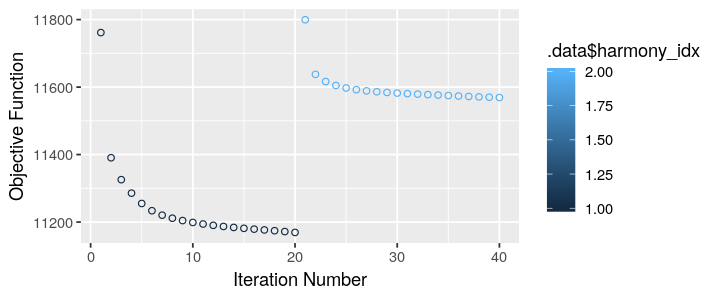

In [9]:
# harmony takes the principle components and normalizes based on the information you provide
# i tell harmony I want to normalize by "batch", which I defined when I initially made the Seurat objects
# %>% is a dplyr command, it takes the command after it and acts on what's before it. e.g. RunHarmony acts on tissue.big
options(repr.plot.height = 2.5, repr.plot.width = 6)
tissue.big <- tissue.big %>% 
    RunHarmony("batch", plot_convergence = TRUE)

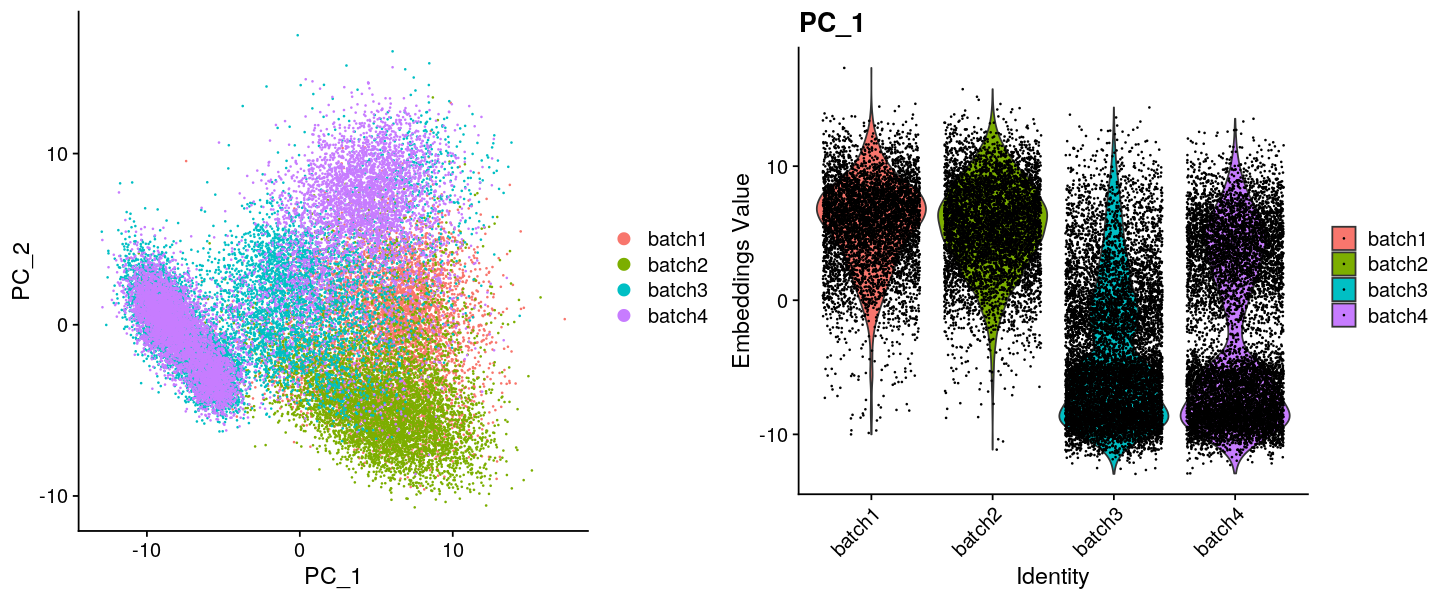

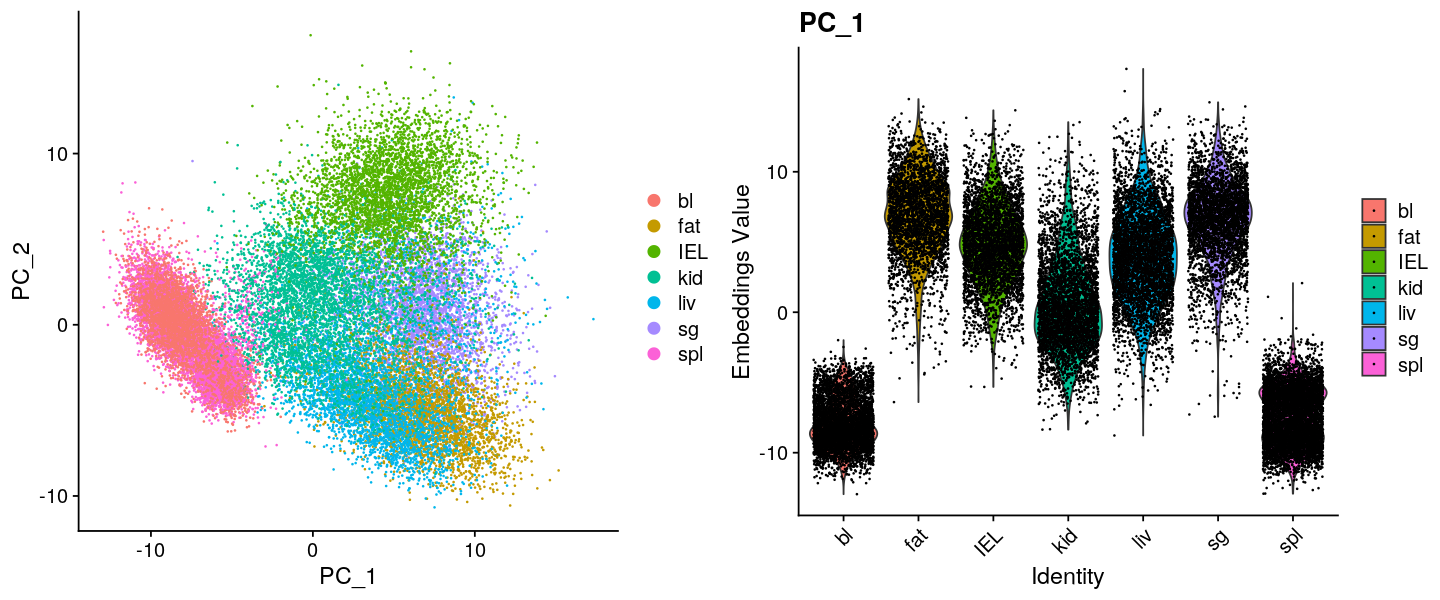

In [10]:
#Plot the PC components before harmony normalization
options(repr.plot.height = 5, repr.plot.width = 12)
p1 <- DimPlot(object = tissue.big, reduction = "pca", pt.size = .1, group.by = "batch", do.return = TRUE)
p2 <- VlnPlot(object = tissue.big, features = "PC_1", group.by = "batch", do.return = TRUE, pt.size = .1)
plot_grid(p1,p2)
p3 <- DimPlot(object = tissue.big, reduction = "pca", pt.size = .1, group.by = "tissue", do.return = TRUE)
p4 <- VlnPlot(object = tissue.big, features = "PC_1", group.by = "tissue", do.return = TRUE, pt.size = .1)
plot_grid(p3,p4)

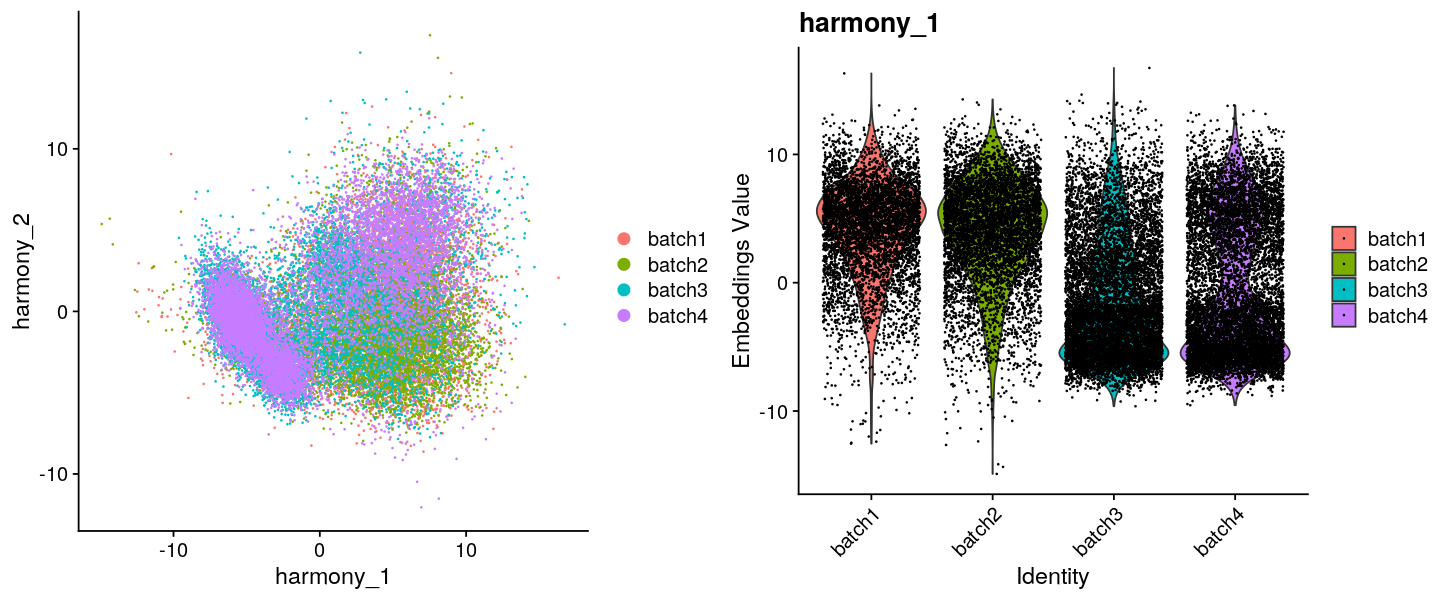

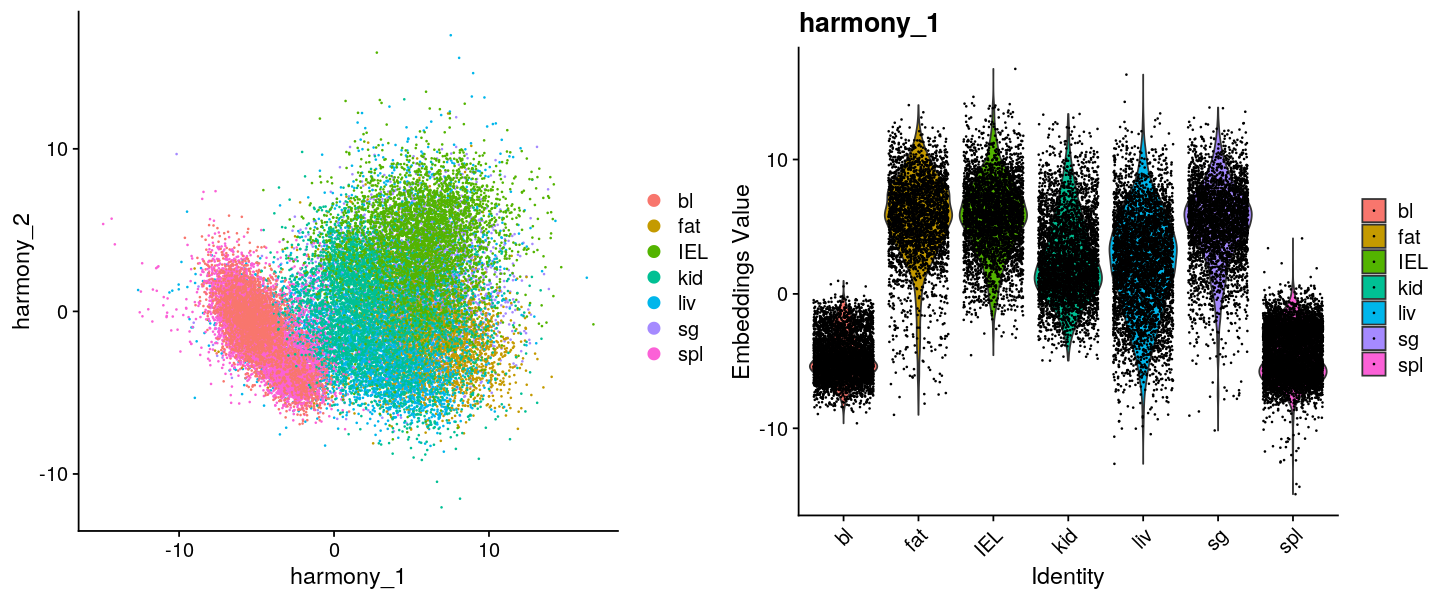

In [11]:
#Plot the PC componenets after normalization (PC1 -> Harmony_1)
options(repr.plot.height = 5, repr.plot.width = 12)
p1 <- DimPlot(object = tissue.big, reduction = "harmony", pt.size = .1, group.by = "batch", do.return = TRUE)
p2 <- VlnPlot(object = tissue.big, features = "harmony_1", group.by = "batch", do.return = TRUE, pt.size = .1)
plot_grid(p1,p2)
p3 <- DimPlot(object = tissue.big, reduction = "harmony", pt.size = .1, group.by = "tissue", do.return = TRUE)
p4 <- VlnPlot(object = tissue.big, features = "harmony_1", group.by = "tissue", do.return = TRUE, pt.size = .1)
plot_grid(p3,p4)


In [12]:
#Everything is now the same as normal seurat. If you want to use the harmony normalized data, define the reduction as "harmony" rather than PCA
tissue.big <- tissue.big %>% 
    RunUMAP(reduction = "harmony", dims = 1:20) %>% 
    FindNeighbors(reduction = "harmony", dims = 1:20) %>% 
    FindClusters(resolution = 0.5) %>% 
    identity()

Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 30339
Number of edges: 868738

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8628
Number of communities: 9
Elapsed time: 7 seconds


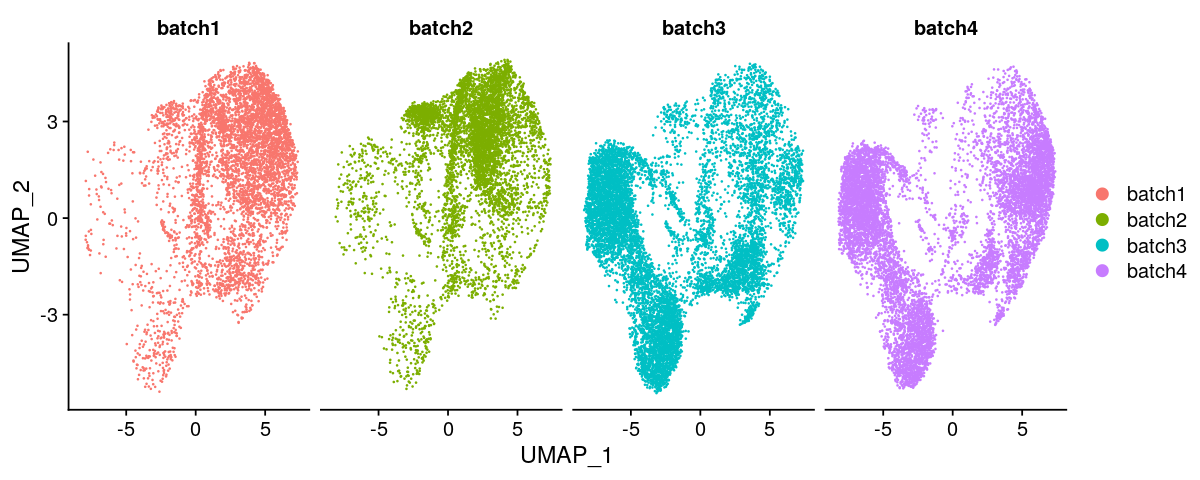

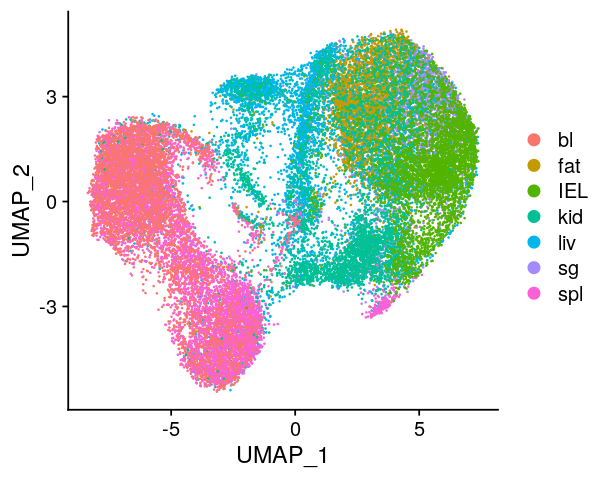

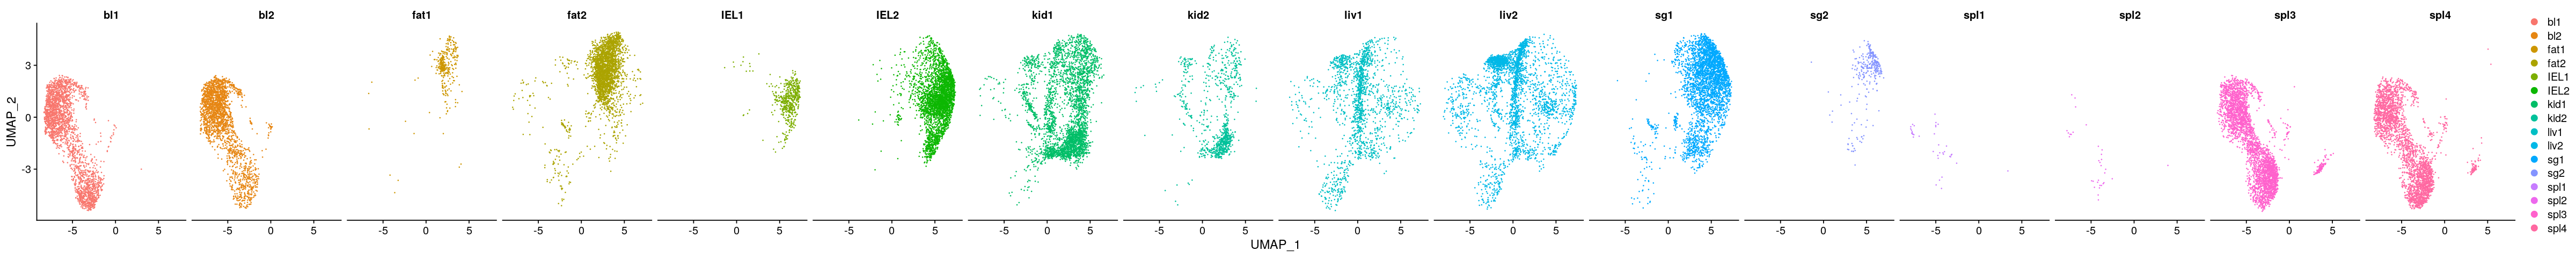

In [13]:
options(repr.plot.height = 4, repr.plot.width = 10)
DimPlot(tissue.big, reduction = "umap", group.by = "batch", pt.size = .1, split.by = 'batch')
options(repr.plot.height = 4, repr.plot.width = 5)
DimPlot(tissue.big, reduction = "umap", group.by = "tissue", pt.size = .1)
options(repr.plot.height = 4, repr.plot.width = 40)
DimPlot(tissue.big, reduction = "umap", group.by = "sample", pt.size = .1, split.by = 'sample')


In [15]:
Idents(tissue.big) <- "tissue"
tissue.big.allmarkers <- FindAllMarkers(tissue.big, only.pos = FALSE, min.pct = 0.25, logfc.threshold = 0.25)
head(tissue.big.allmarkers)

Calculating cluster spl
Calculating cluster sg
Calculating cluster fat
Calculating cluster liv
Calculating cluster bl
Calculating cluster IEL
Calculating cluster kid


p_val avg_logFC pct.1 pct.2 p_val_adj cluster gene   
Cx3cr1  0     0.7889550 0.372 0.138 0         spl     Cx3cr1 
S1pr1   0     0.7006946 0.498 0.221 0         spl     S1pr1  
Fam65b  0     0.6487446 0.554 0.293 0         spl     Fam65b 
Cmah    0     0.6347339 0.351 0.131 0         spl     Cmah   
Rasgrp2 0     0.5961463 0.459 0.229 0         spl     Rasgrp2
Arl4c   0     0.5938546 0.739 0.492 0         spl     Arl4c

In [ ]:
# save seurat object as RDS file and save cluster genes as csv
write.csv((tissue.big.allmarkers %>% group_by(cluster)), file = "/home/jcrowl/projects/TC007_tissue_p14_sc/SingleCellAnalysis/Harmony/Harmony_9_24/all_tissue_markers_resident.csv") 
saveRDS(tissue.big, file = "/home/jcrowl/projects/TC007_tissue_p14_sc/SingleCellAnalysis/Harmony/Harmony_9_24/seurat_harmony_resident.rds")

In [1]:
# read in rds file as seurat object
tissue.big <- readRDS(file = "/home/jcrowl/projects/TC007_tissue_p14_sc/SingleCellAnalysis/Harmony/Harmony_9_24/seurat_harmony.rds")

In [19]:
# read in markers csv file as an R object
tissue.big.markers <- read.csv("/home/jcrowl/projects/TC007_tissue_p14_sc/SingleCellAnalysis/Harmony/Harmony_9_24/cluster_markers.csv")

In [16]:
# add module scores for specific gene lists and the difference between them
Tcm_list <- read.table(file = "/home/jcrowl/projects/TC007_tissue_p14_sc/SingleCellAnalysis/Harmony/Harmony_9_24/UpinTCMvsTEM.txt")
Tem_list <- read.table(file = "/home/jcrowl/projects/TC007_tissue_p14_sc/SingleCellAnalysis/Harmony/Harmony_9_24/UpinTEMvsTcm.txt")

tissue.big <- AddModuleScore(object = tissue.big, Tcm_list, name = 'Tcm_score')
tissue.big <- AddModuleScore(object = tissue.big, Tem_list, name = 'Tem_score')
tissue.big$TcmvsTem <- tissue.big$Tcm_score1 - tissue.big$Tem_score1

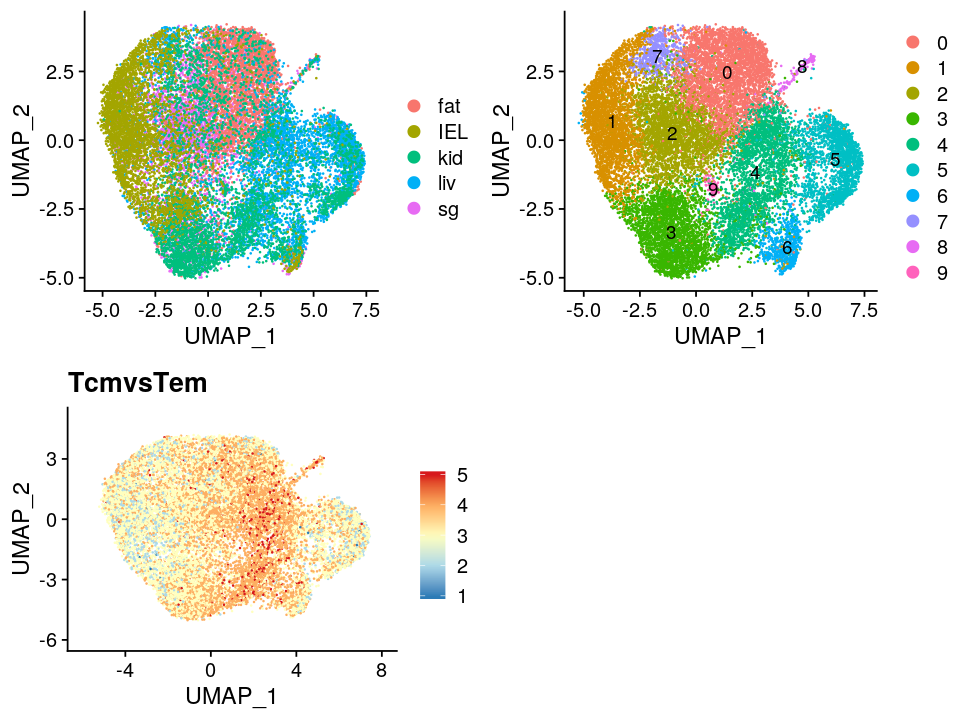

In [17]:
# plot by tissue, by cluster, and by effector vs memory score
p1 <- DimPlot(tissue.big, reduction = "umap", group.by = "tissue", pt.size = .1)
p2 <- DimPlot(tissue.big, reduction = "umap", label=TRUE, pt.size = .1)
p3 <- FeaturePlot(object = tissue.big, features = 'TcmvsTem', cols = rev(brewer.pal(5,"RdYlBu")))
options(repr.plot.height = 6, repr.plot.width = 8)
plot_grid(p1,p2,p3)